In [1]:
# Load dataset
import pandas as pd
df = pd.read_csv("titanic.csv", usecols=["Pclass","Sex","Age","Fare","Survived"])
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [2]:
# checking missing values
df.isnull().sum()

,0
Pclass,0
Sex,0
Age,177
Fare,0
Survived,0


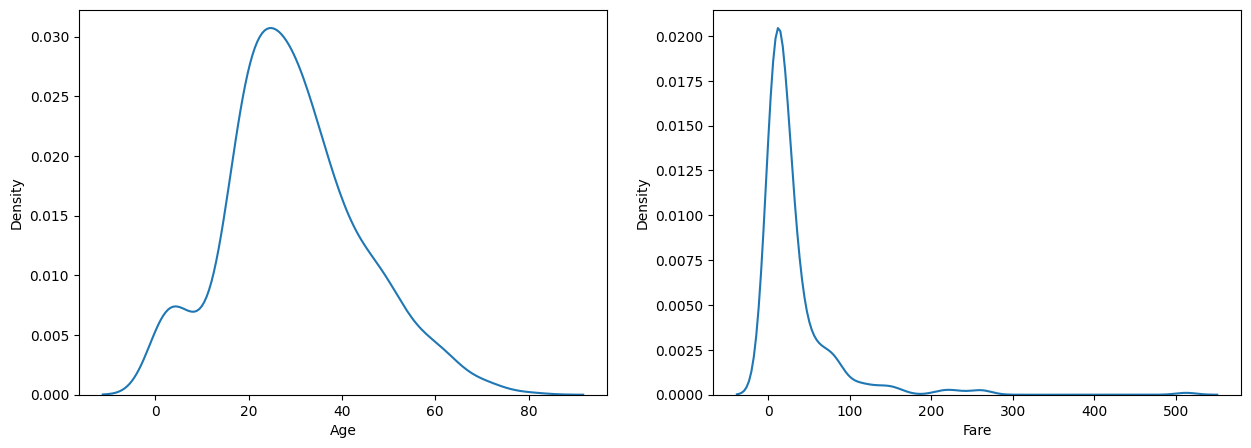

In [13]:
# Visualizing kdeplot of 'Age' and 'Fare'
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.kdeplot(df['Age'])
plt.subplot(1,2,2)
sns.kdeplot(df['Fare'])
plt.show()

In [43]:
# Train test split
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [44]:
# Imputing missing values in age by mean
from sklearn.impute import SimpleImputer
si = SimpleImputer()
X_train['Age'] = si.fit_transform(X_train[['Age']])
X_test['Age'] = si.transform(X_test[['Age']])

In [45]:
X_train.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
Fare,0


In [46]:
# One hot encoding Sex column
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder(drop='first', sparse_output=False)

df_encoded = oe.fit_transform(X_train[['Sex']])
df_encoded_train = pd.DataFrame(df_encoded, columns=oe.get_feature_names_out(), index=X_train.index)
X_train = pd.concat([X_train, df_encoded_train], axis=1)
X_train = X_train.drop('Sex', axis=1)

df_encoded = oe.fit_transform(X_test[['Sex']])
df_encoded_test = pd.DataFrame(df_encoded, columns=oe.get_feature_names_out(), index=X_test.index)
X_test = pd.concat([X_test, df_encoded_test], axis=1)
X_test = X_test.drop('Sex', axis=1)

In [50]:
# Applying naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [51]:
# Checking score
nb.score(X_test, Y_test)

0.8100558659217877

In [54]:
# Viewing model prediction for 1st 10 test data
print("Actual :-", Y_test[0:10].values)
print("Predicted :-", nb.predict(X_test[0:10]))

Actual :- [1 0 0 0 0 0 0 1 0 1]
Predicted :- [1 0 0 0 1 1 0 1 0 1]


In [58]:
# Viewing predicted probabilities
nb.predict_proba(X_test[:10])

array([[4.90694829e-02, 9.50930517e-01],
       [7.22318632e-01, 2.77681368e-01],
       [9.15828280e-01, 8.41717200e-02],
       [7.16650983e-01, 2.83349017e-01],
       [6.45098403e-09, 9.99999994e-01],
       [4.60851328e-01, 5.39148672e-01],
       [9.14037975e-01, 8.59620249e-02],
       [3.27194723e-02, 9.67280528e-01],
       [9.65677857e-01, 3.43221433e-02],
       [1.34903949e-03, 9.98650961e-01]])

<Axes: >

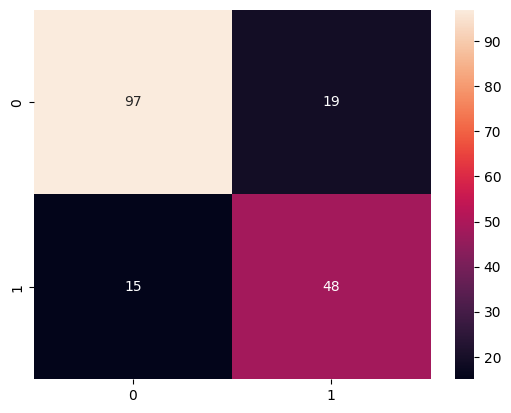

In [59]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, nb.predict(X_test))
sns.heatmap(cm, annot=True)

In [60]:
# Calculate socre using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(), X_train, Y_train, cv=5)

array([0.74825175, 0.71328671, 0.80985915, 0.78873239, 0.72535211])